In [1]:
from pyspark.sql import  SQLContext 
from pyspark import SparkContext
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
sc = SparkContext('local')
sqlctx = SQLContext(sc)

In [3]:
cardf = sqlctx.read.csv('../data/cars.csv', header=True, inferSchema=True)
cardf.show()

+---+-----+----+
|_c0|speed|dist|
+---+-----+----+
|  1|    4|   2|
|  2|    4|  10|
|  3|    7|   4|
|  4|    7|  22|
|  5|    8|  16|
|  6|    9|  10|
|  7|   10|  18|
|  8|   10|  26|
|  9|   10|  34|
| 10|   11|  17|
| 11|   11|  28|
| 12|   12|  14|
| 13|   12|  20|
| 14|   12|  24|
| 15|   12|  28|
| 16|   13|  26|
| 17|   13|  34|
| 18|   13|  34|
| 19|   13|  46|
| 20|   14|  26|
+---+-----+----+
only showing top 20 rows



In [68]:
pdCar = cardf.toPandas()

# 학습을 통해 구한 기울기와 절편값
w = lr_model.coefficients[0]
b = lr_model.intercept
pdCar['lr'] = w*pdCar['speed'] + b
pdCar

,_c0,speed,dist,lr
0,1,4,2,-2.633379
1,2,4,10,-2.633379
2,3,7,4,9.607980
3,4,7,22,9.607980
4,5,8,16,13.688433
5,6,9,10,17.768886
6,7,10,18,21.849340
7,8,10,26,21.849340
8,9,10,34,21.849340
9,10,11,17,25.929793


### 자동차 속도를 10으로 했을 때 제동 거리가 얼마로 예측되는가?
- y = wx + b
- w, b를 구하는 법
    - **학습**을 통해서 구하기
        - 대부분의 딥러닝은 학습을 통해 구한다
    - 미분 공식 통해서 구하기

In [7]:
# spark로 상관관계 구하기
cardf.corr( 'dist','speed' ) 
# 강한 양의 상관관계
# 상관관계가 높아야지 train이 잘 된다. 

0.8068949006892103

#### x( 자동차 속도 ) : feature, **특성** 데이터(단일 선형), n개의 데이터가 올 수 있음(다중 선형)
- 특성데이터를 vector assembler로 묶어주는 작업 필요

#### y ( 제동 거리 )  : label, 정답

## 기울기와 절편을 구하기
- **VectorAssembler**
    - vector값들을 하나의 feature로 묶는 방법이다
    - inputCols = feature로 삼을 컬럼
    - outputCol = 이들의 컬럼명


- **randomSplit()**
    - 훈련 데이터와 테스트 데이터를 나누는 방법
    

- **LinearRegression()**
    - 선형 회귀 분석

In [4]:
f = VectorAssembler( inputCols=['speed'], outputCol='features' ) 
# inputCols에 여러개 올 수 있다. ( 다중선형회귀 )
v_df = f.transform( cardf )
v_df.show() # inputCols이 features에 하나로 묶여있음

+---+-----+----+--------+
|_c0|speed|dist|features|
+---+-----+----+--------+
|  1|    4|   2|   [4.0]|
|  2|    4|  10|   [4.0]|
|  3|    7|   4|   [7.0]|
|  4|    7|  22|   [7.0]|
|  5|    8|  16|   [8.0]|
|  6|    9|  10|   [9.0]|
|  7|   10|  18|  [10.0]|
|  8|   10|  26|  [10.0]|
|  9|   10|  34|  [10.0]|
| 10|   11|  17|  [11.0]|
| 11|   11|  28|  [11.0]|
| 12|   12|  14|  [12.0]|
| 13|   12|  20|  [12.0]|
| 14|   12|  24|  [12.0]|
| 15|   12|  28|  [12.0]|
| 16|   13|  26|  [13.0]|
| 17|   13|  34|  [13.0]|
| 18|   13|  34|  [13.0]|
| 19|   13|  46|  [13.0]|
| 20|   14|  26|  [14.0]|
+---+-----+----+--------+
only showing top 20 rows



In [44]:
v_df = v_df.select( 'dist', 'features' )
v_df.count()

50

In [45]:
# train( w,b를 구하는 학습용 셋)
# test( 구해진 w,b를 가지고 test하는 데이터 셋 )
train_df, test_df = v_df.randomSplit( [0.7,0.3] ) # 7:3
train_df.count() , test_df.count()

(36, 14)

In [46]:
train_df.show(5)

+----+--------+
|dist|features|
+----+--------+
|  10|   [4.0]|
|  10|   [9.0]|
|  14|  [12.0]|
|  16|   [8.0]|
|  17|  [11.0]|
+----+--------+
only showing top 5 rows



In [47]:
lr = LinearRegression(featuresCol='features',
                     labelCol='dist',
                     maxIter=100,     # 학습 횟수
                     regParam = 0.01, # running mate
                     )
lr_model = lr.fit( train_df ) # 학습을 시작

In [48]:
#회귀 계수값( 기울기, 절편) y=wx +b  (w,b)
print("기울기(w)",lr_model.coefficients )
print("절편(b)", lr_model.intercept )

기울기(w) [4.080453172832761]
절편(b) -18.95519218884711


## 자동차 속도가 15일 때 제동거리는 얼마인가?

In [55]:
lr_model.coefficients[0]*15 + lr_model.intercept

42.251605403644305

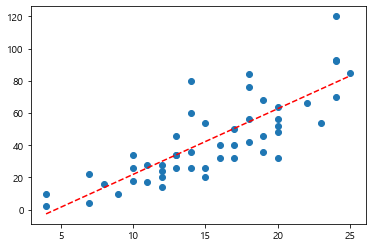

In [69]:
plt.scatter( pdCar['speed'], pdCar['dist'] )
plt.plot(  pdCar['speed'], pdCar['lr'], 'r--')
plt.show()